In [ ]:
!pip install --pre pycaret
!pip install autoviz
!pip install pycaret[mlops]
!pip install pycaret[analysis]
!pip install shap

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 487 kB 6.7 MB/s 
     |████████████████████████████████| 280 kB 75.5 MB/s 
     |████████████████████████████████| 3.4 MB 60.3 MB/s 
     |████████████████████████████████| 7.0 MB 50.7 MB/s 
     |████████████████████████████████| 62 kB 1.2 MB/s 
     |████████████████████████████████| 72 kB 630 kB/s 
     |████████████████████████████████| 1.5 MB 56.9 MB/s 
     |████████████████████████████████| 106 kB 68.0 MB/s 
     |████████████████████████████████| 79.9 MB 1.1 MB/s 
     |████████████████████████████████| 45 kB 1.8 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 141 kB 109.1 MB/s 
     |████████████████████████████████| 43 kB 2.5 MB/s 
     |████████████████████████████████| 9.4 MB 79.4 MB/s 
     |███████████████████████

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 64 kB 2.6 MB/s 
     |████████████████████████████████| 16.5 MB 15.9 MB/s 
     |████████████████████████████████| 12.9 MB 61.1 MB/s 
     |████████████████████████████████| 3.2 MB 68.0 MB/s 
     |████████████████████████████████| 240 kB 73.4 MB/s 
     |████████████████████████████████| 1.7 MB 63.2 MB/s 
     |████████████████████████████████| 55 kB 4.3 MB/s 
     |████████████████████████████████| 18.5 MB 107 kB/s 
     |████████████████████████████████| 121 kB 62.3 MB/s 
     |████████████████████████████████| 83 kB 2.7 MB/s 
  Created wheel for emoji: filename=emoji-2.2.0-py3-none-any.whl size=234926 sha256=9ff52fe3d502f487d18ac00b8d0aa0aec2e7d9639e1a4e9848ba6bd862f53125
  Stored in directory: /root/.cache/pip/wheels/86/62/9e/a6b27a681abcde69970dbc0326ff51955f3beac72f15696984
Successfully built emoji
  Attempting uninstall: bokeh
    Found exis

In [ ]:
#Descomprimir el archivo en este caso RAR con !unrar x 'Path del archivo' 'Path de la carpeta destino'
!unrar x '/content/drive/MyDrive/Colab Notebooks/U_DS_Projects_Data Analysis & ML/P4-Hotel Reviews Sentiment Analysis and Classification/hotel+reviews+data.rar' '/content/sample_data'


UNRAR 5.50 freeware      Copyright (c) 1993-2017 Alexander Roshal


Extracting from /content/drive/MyDrive/Colab Notebooks/U_DS_Projects_Data Analysis & ML/P4-Hotel Reviews Sentiment Analysis and Classification/hotel+reviews+data.rar

Extracting  /content/sample_data/tripadvisor_hotel_reviews.csv            94% 99%  OK 
All OK


#Proyect

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 
import numpy as np 

In [ ]:
data = pd.read_csv('/content/sample_data/tripadvisor_hotel_reviews.csv')

In [ ]:
data.info()
data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20491 entries, 0 to 20490
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Review  20491 non-null  object
 1   Rating  20491 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 320.3+ KB


,Review,Rating
0,nice hotel expensive parking got good deal sta...,4
1,ok nothing special charge diamond member hilto...,2
2,nice rooms not 4* experience hotel monaco seat...,3
3,"unique, great stay, wonderful time hotel monac...",5
4,"great stay great stay, went seahawk game aweso...",5


In [ ]:
data.tail()

,Review,Rating
20486,"best kept secret 3rd time staying charm, not 5...",5
20487,great location price view hotel great quick pl...,4
20488,"ok just looks nice modern outside, desk staff ...",2
20489,hotel theft ruined vacation hotel opened sept ...,1
20490,"people talking, ca n't believe excellent ratin...",2


In [ ]:
data.shape

(20491, 2)

In [ ]:
data.isnull().sum()

Review    0
Rating    0
dtype: int64

In [ ]:
blanks = []
for index in data['Review']:
  if index.isspace() == True:
    blanks.append(index)

In [ ]:
blanks 

[]

In [ ]:
data['Rating'].value_counts().sort_values()

1    1421
2    1793
3    2184
4    6039
5    9054
Name: Rating, dtype: int64

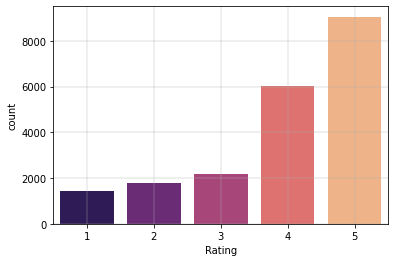

In [ ]:
sns.countplot(data=data, x='Rating', palette='magma')
plt.grid(True, linewidth=.4, linestyle='-')
plt.show()

In [ ]:
def rating(rating):
  if rating > 3 and rating <=5:
    return 'Positive'
  if rating > 0 and rating <=3:
    return 'Negative'
data['Rating_posorneg'] = data['Rating'].apply(rating)

In [ ]:
data.head()

,Review,Rating,Rating_posorneg
0,nice hotel expensive parking got good deal sta...,4,Positive
1,ok nothing special charge diamond member hilto...,2,Negative
2,nice rooms not 4* experience hotel monaco seat...,3,Negative
3,"unique, great stay, wonderful time hotel monac...",5,Positive
4,"great stay great stay, went seahawk game aweso...",5,Positive


In [ ]:
data['Rating_posorneg'].value_counts().sort_values()

Negative     5398
Positive    15093
Name: Rating_posorneg, dtype: int64

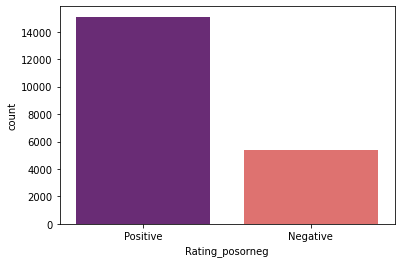

In [ ]:
sns.countplot(data=data,x='Rating_posorneg', palette='magma')
plt.show()

#### Sentiment Analysis

In [ ]:
import nltk
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


True

In [ ]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
sentanalyze = SentimentIntensityAnalyzer()

In [ ]:
data['Scores'] = data['Review'].apply(lambda review: sentanalyze.polarity_scores(review))

In [ ]:
data.head()

,Review,Rating,Rating_posorneg,Scores
0,nice hotel expensive parking got good deal sta...,4,Positive,"{'neg': 0.072, 'neu': 0.643, 'pos': 0.285, 'co..."
1,ok nothing special charge diamond member hilto...,2,Negative,"{'neg': 0.11, 'neu': 0.701, 'pos': 0.189, 'com..."
2,nice rooms not 4* experience hotel monaco seat...,3,Negative,"{'neg': 0.081, 'neu': 0.7, 'pos': 0.219, 'comp..."
3,"unique, great stay, wonderful time hotel monac...",5,Positive,"{'neg': 0.06, 'neu': 0.555, 'pos': 0.385, 'com..."
4,"great stay great stay, went seahawk game aweso...",5,Positive,"{'neg': 0.135, 'neu': 0.643, 'pos': 0.221, 'co..."


In [ ]:
data['Compound'] = data['Scores'].apply(lambda f:f['compound'])

In [ ]:
data.head()

,Review,Rating,Rating_posorneg,Scores,Compound
0,nice hotel expensive parking got good deal sta...,4,Positive,"{'neg': 0.072, 'neu': 0.643, 'pos': 0.285, 'co...",0.9747
1,ok nothing special charge diamond member hilto...,2,Negative,"{'neg': 0.11, 'neu': 0.701, 'pos': 0.189, 'com...",0.9787
2,nice rooms not 4* experience hotel monaco seat...,3,Negative,"{'neg': 0.081, 'neu': 0.7, 'pos': 0.219, 'comp...",0.9889
3,"unique, great stay, wonderful time hotel monac...",5,Positive,"{'neg': 0.06, 'neu': 0.555, 'pos': 0.385, 'com...",0.9912
4,"great stay great stay, went seahawk game aweso...",5,Positive,"{'neg': 0.135, 'neu': 0.643, 'pos': 0.221, 'co...",0.9797


In [ ]:
data['Compound_posorneg'] = data['Compound'].apply(lambda score:'Positive' if score >= 0 else 'Negative')

In [ ]:
data.head()

,Review,Rating,Rating_posorneg,Scores,Compound,Compound_posorneg
0,nice hotel expensive parking got good deal sta...,4,Positive,"{'neg': 0.072, 'neu': 0.643, 'pos': 0.285, 'co...",0.9747,Positive
1,ok nothing special charge diamond member hilto...,2,Negative,"{'neg': 0.11, 'neu': 0.701, 'pos': 0.189, 'com...",0.9787,Positive
2,nice rooms not 4* experience hotel monaco seat...,3,Negative,"{'neg': 0.081, 'neu': 0.7, 'pos': 0.219, 'comp...",0.9889,Positive
3,"unique, great stay, wonderful time hotel monac...",5,Positive,"{'neg': 0.06, 'neu': 0.555, 'pos': 0.385, 'com...",0.9912,Positive
4,"great stay great stay, went seahawk game aweso...",5,Positive,"{'neg': 0.135, 'neu': 0.643, 'pos': 0.221, 'co...",0.9797,Positive


In [ ]:
example = 'Hotel was excellent and I enjoyed it'
sentanalyze.polarity_scores(example)

{'neg': 0.0, 'neu': 0.364, 'pos': 0.636, 'compound': 0.7906}

In [ ]:
example = 'Hotel was not excellent and I did not enjoy it'
sentanalyze.polarity_scores(example)

{'neg': 0.446, 'neu': 0.554, 'pos': 0.0, 'compound': -0.6834}

In [ ]:
example = 'Hotel was not excellent but I enjoyed it'
sentanalyze.polarity_scores(example)

{'neg': 0.526, 'neu': 0.474, 'pos': 0.0, 'compound': -0.6759}

In [ ]:
example = 'Hotel was excellent but I did not enjoy it'
sentanalyze.polarity_scores(example)

{'neg': 0.292, 'neu': 0.509, 'pos': 0.199, 'compound': -0.2714}

#### Classification of Reviews

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X = data['Review']
y = data['Rating_posorneg']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3)

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import LinearSVC

In [ ]:
textclf = Pipeline([('tfidf', TfidfVectorizer()),
                    ('clf',LinearSVC())]
                   )

In [ ]:
textclf.fit(X_train, y_train)

Pipeline(steps=[('tfidf', TfidfVectorizer()), ('clf', LinearSVC())])

In [ ]:
preds = textclf.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test,preds))

0.8975276512687053


In [ ]:
newreview = [('Hotel was perfect, we liked it!')]
textclf.predict(newreview)

array(['Positive'], dtype=object)